In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [10]:
# Generate synthetic sales data with explanation
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')  # Creating a date range
sales = np.cumsum(np.random.randint(50, 200, size=100))  # Generating cumulative sales data
data = pd.DataFrame({'Date': dates, 'Sales': sales})  # Creating a DataFrame
data.set_index('Date', inplace=True)  # Setting Date as index for time series analysis

In [11]:
# Splitting data into training and testing sets
train_size = int(len(data) * 0.8)  # Using 80% of data for training
train, test = data[:train_size], data[train_size:]  # Splitting the dataset



In [12]:
# Training the AutoReg model with lag of 5
auto_reg_model = AutoReg(train, lags=5)
model_fit = auto_reg_model.fit()


C:\Users\Anamika\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [13]:
# Making predictions on the test data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

C:\Users\Anamika\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [6]:
# Extend forecast
future_steps = 10
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]
future_predictions = model_fit.predict(start=len(data), end=len(data) + future_steps - 1, dynamic=False)


C:\Users\Anamika\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [7]:
# Extend forecast
future_steps = 10
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]
future_predictions = model_fit.predict(start=len(data), end=len(data) + future_steps - 1, dynamic=False)


C:\Users\Anamika\anaconda3\envs\notebook\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


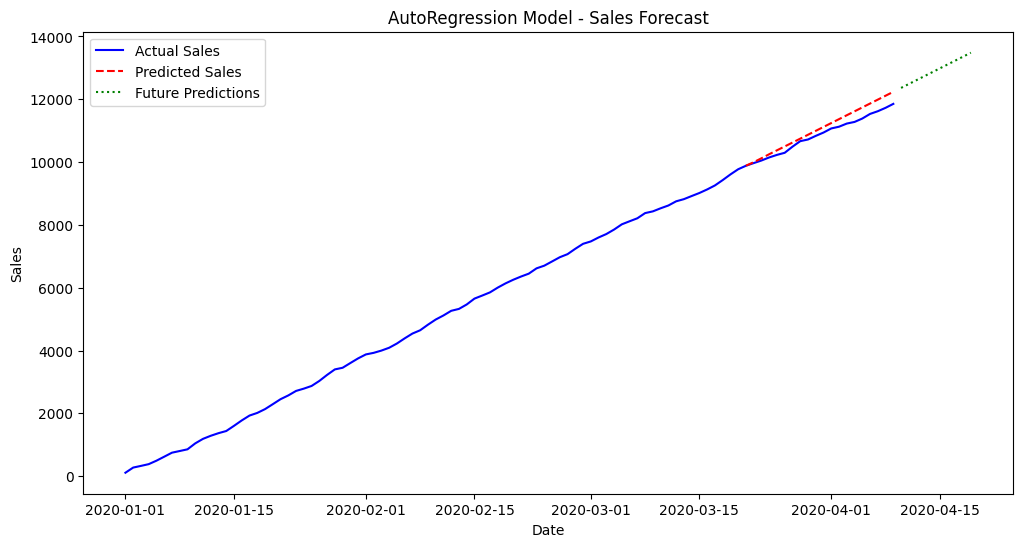

In [8]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Sales'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales', color='red', linestyle='dashed')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='green', linestyle='dotted')
plt.legend()
plt.title('AutoRegression Model - Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [9]:
# Print future predictions
future_forecast = pd.DataFrame({'Date': future_dates, 'Predicted Sales': future_predictions})
print(future_forecast)

                 Date  Predicted Sales
2020-04-10 2020-04-10     12361.119525
2020-04-11 2020-04-11     12485.508365
2020-04-12 2020-04-12     12609.917004
2020-04-13 2020-04-13     12734.345527
2020-04-14 2020-04-14     12858.794153
2020-04-15 2020-04-15     12983.262903
2020-04-16 2020-04-16     13107.751709
2020-04-17 2020-04-17     13232.260554
2020-04-18 2020-04-18     13356.789460
2020-04-19 2020-04-19     13481.338443
